# Global Power Plant Database

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database:

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation:

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

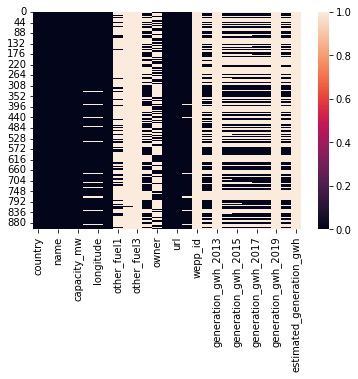

In [6]:
sns.heatmap(df.isnull())

We can see that there are many columns in the dataset which have 100% or almost 100% missing values

1.other_fuel1

2.other_fuel2

3.other_fuel3

4.wepp_id

5.generation_gwh_2013

6.generation_gwh_2019

7.estimated_generation_gwh

No null value present in our target columns(primary_fuel and capacity_mw

In [7]:
#drop the columns that have 100% or almost 100% missing values

df=df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [9]:
df.shape

(907, 20)

we dropped 7 columns

In [10]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  url                     907 non-null    object 
 12  geolocation_source      888 non-null    object 
 13  year_of_capacity_data   519 non-null    float64
 14  generation_gwh_2014     398 non-null    fl

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


we see the mean,standard_deviation,minimum value,25th percentile,50th percentile,75th percentile,maximum value by df.describe

1.min of capacity_mw column is zero its mean that one or more than one power plant were completely shut down when data was collected

2.From the difference between maximum and 75th percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

and we can zero in year of capacity data column in std 

# Exploratory Data Analysis (EDA)

In [14]:
df.dtypes.index

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [16]:
# checking the catrgorical columns

cat_columns= []
index_c= []
m = 0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_columns.append(i)
        index_c.append(m)
    m=m+1
print(cat_columns)
print(index_c)

['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
[0, 1, 2, 3, 7, 9, 10, 11, 12, 19]


In [18]:
len(cat_columns)

10

In [20]:
num_columns = []
index_n = []
m = 0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_columns.append(i)
        index_n.append(m)
    m=m+1
print(num_columns)
print(index_n)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
[4, 5, 6, 8, 13, 14, 15, 16, 17, 18]


In [21]:
len(num_columns)

10

In [22]:
len(df.dtypes.index)==len(num_columns)+len(cat_columns)

True

# Univariate Analysis:

column Name: country


IND    907
Name: country, dtype: int64


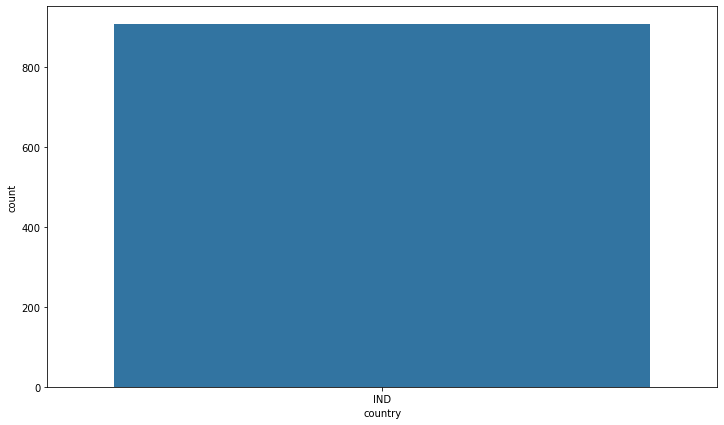



####################################################################################################


In [23]:
i=0 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since "country" colums stored only one type value,we drop this column

In [24]:
#appending "country" column in drop_columns list
drop_columns=[]
drop_columns.append("country")

column Name: country_long


India    907
Name: country_long, dtype: int64


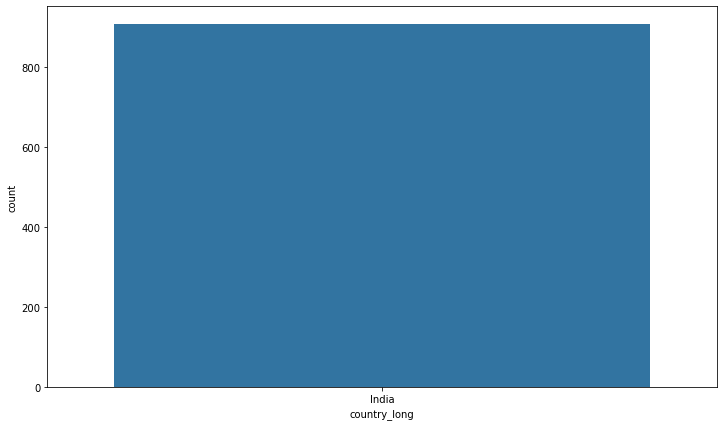



####################################################################################################


In [25]:
i=1 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since "country_long" column stored only one type value,we drop this column

In [26]:
#appending "country_long" column in drop_columns list
drop_columns.append("country_long")

column Name: name


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


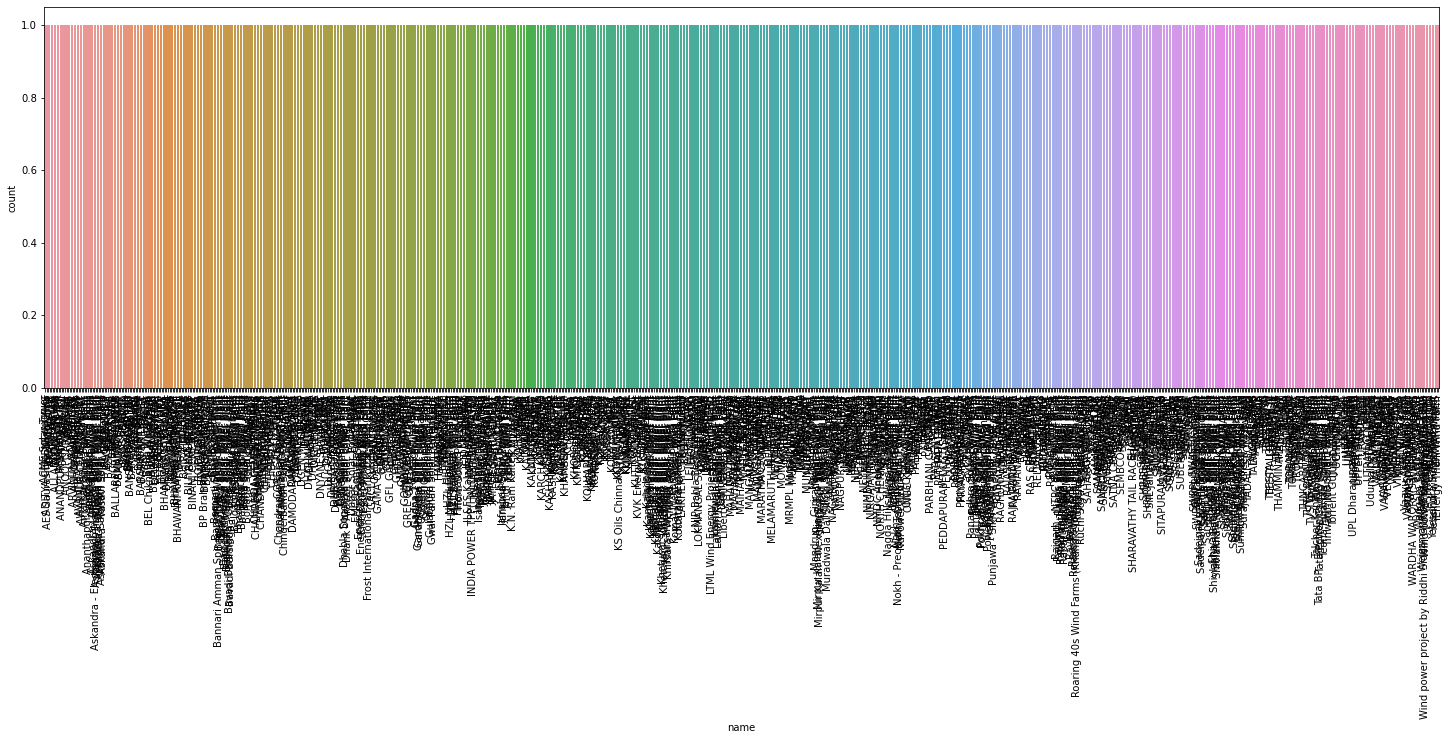



####################################################################################################


In [27]:
i=2 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(25,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

In [28]:
df["name"].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [29]:
#appending "name" column in drop_columns list
drop_columns.append("name")

column Name: gppd_idnr


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


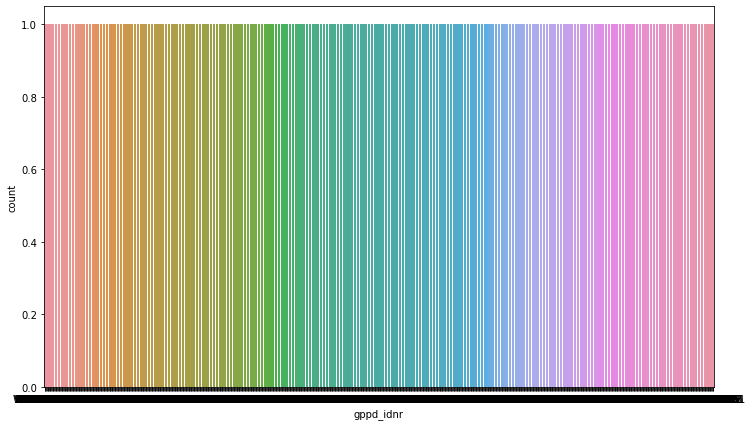



####################################################################################################


In [30]:
i=3 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

In [31]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [32]:
len(df['gppd_idnr'].unique())

907

In [33]:
#appending "gppd_idnr" column in drop_columns list
drop_columns.append("gppd_idnr")

column Name: primary_fuel


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


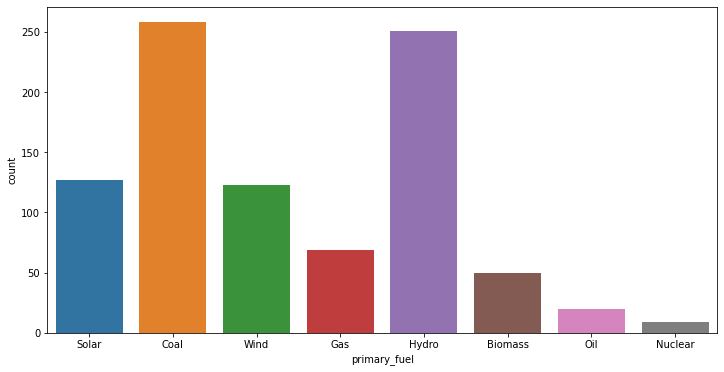



####################################################################################################


In [37]:
i=7
print('column Name:',df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print("\n")
print("#"*100)

This our output columns.we see that
there is 8 types of catagorical data.we convert this catagorical data into numerical data when we creat the model.
maximum primary fuel of power plant is coal and hydro
the class is imbalanced.we will balanced later on

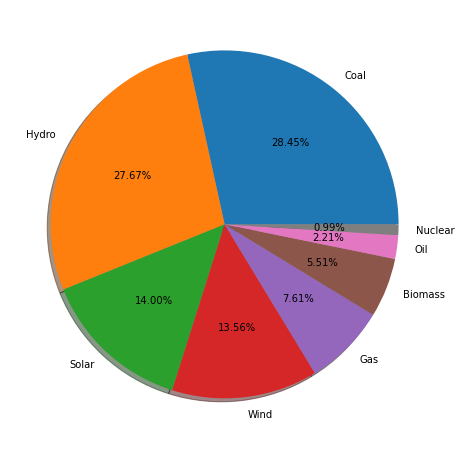

In [42]:
# pie plot of primary fuel column
labels= 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(df['primary_fuel'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

we get better visualisation from pie plt for the distribution of primery fuel of power plant

Hydro covers 27.67%

column name owner


Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64


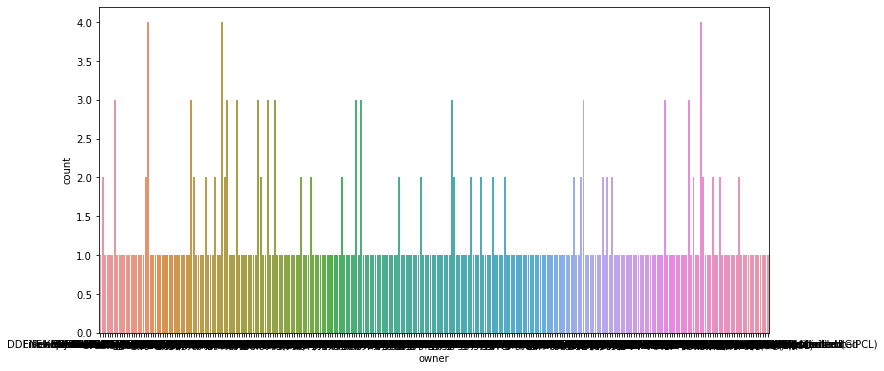



####################################################################################################


In [46]:
i = 9
print("column name",df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

In [49]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [50]:
len(df['owner'].unique())

281

we see that
few companies owner have more than one power plant. three owner has 4 Global Power plant.
maximum owner have one power plant.
since this owner of the power plant is not necessary for the model's output,we drop this column.

In [51]:
#appending "owner" column in drop_columns list
drop_columns.append("owner")

column name source


Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


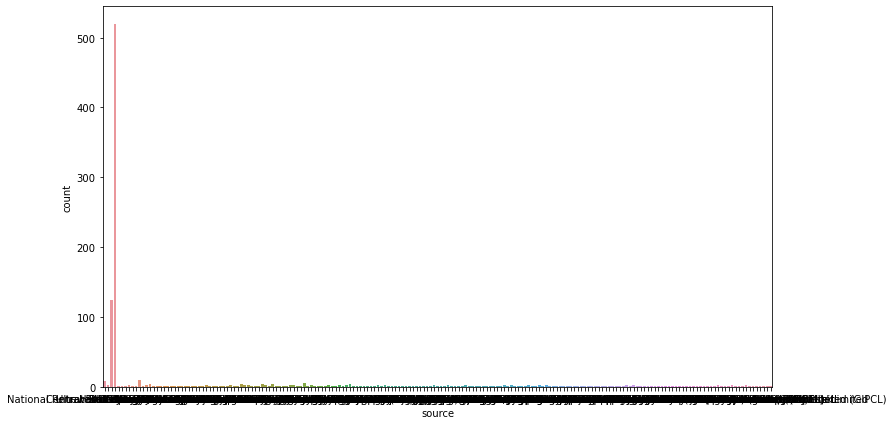



####################################################################################################


In [53]:
i =10
print('column name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

In [54]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [56]:
len(df['source'].unique())

191

we see that
source of the data stored in "source" column.source of the maximum data is Central Electricity Authority.
since this source of the data is not necessary for the model's output,we drop this column.

In [58]:
#appending "source" column in drop_columns list
drop_columns.append("source")

column Name: url


http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Le

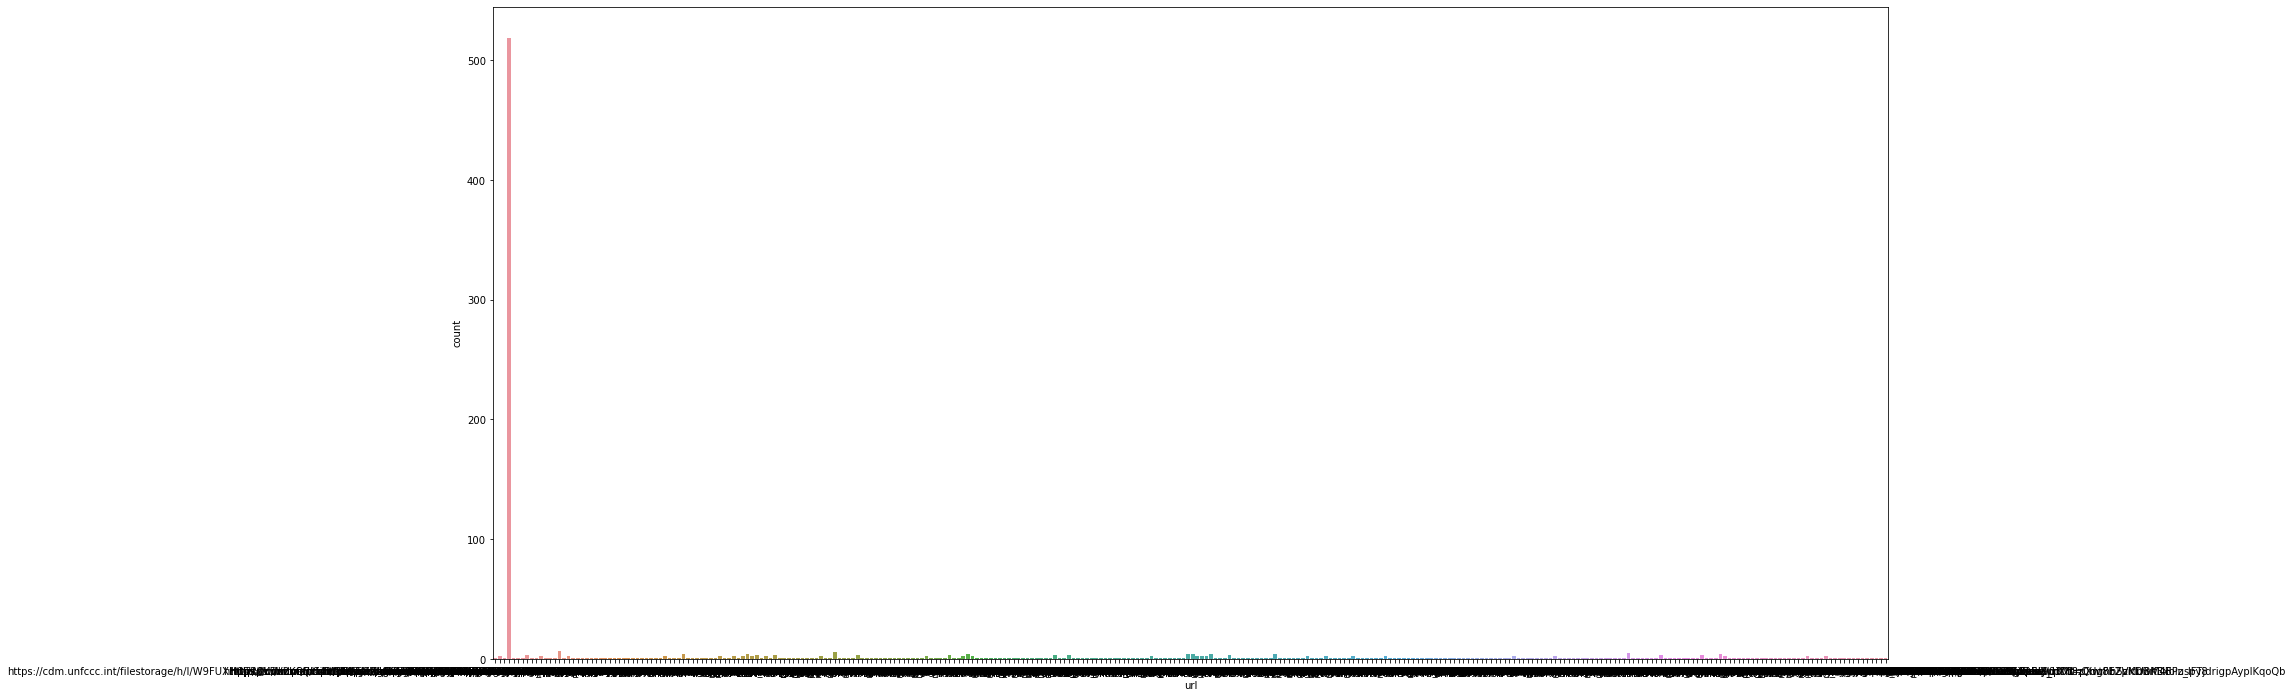



####################################################################################################


In [59]:
i=11 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(25,12))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

In [60]:
df["url"].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [61]:
len(df["url"].unique())

304

source url of the data stored in "url" column.
since this source of the data is not necessary for the model's output,we drop this column.

In [63]:
#appending "source" column in drop_columns list
drop_columns.append("url")

column Name: geolocation_source


WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


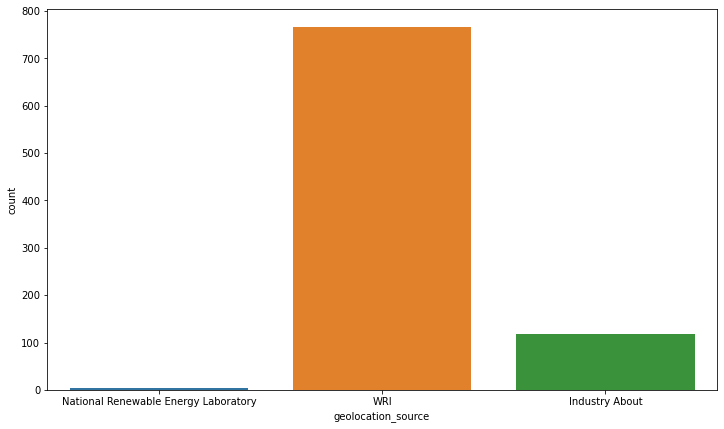



####################################################################################################


In [64]:
i=12 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: generation_data_source


Central Electricity Authority    449
Name: generation_data_source, dtype: int64


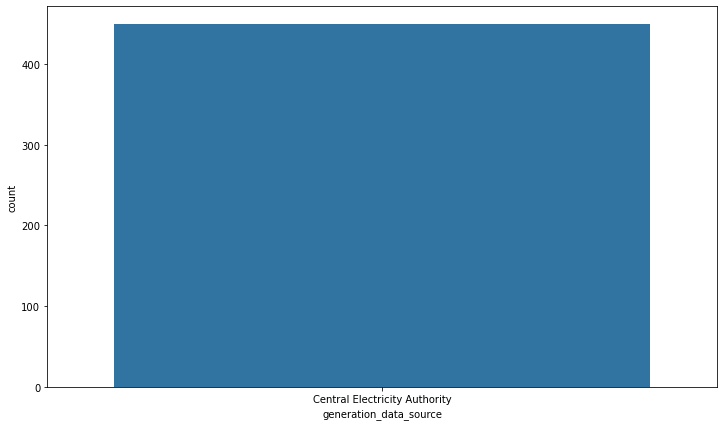



####################################################################################################


In [65]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we see that 'generation_data_source' column stored only one type of catagorical data and generation_data_source is not necessary for the model's output.so,we drop this column.

In [66]:
#appending "generation_data_source" column in drop_columns list
drop_columns.append("generation_data_source")

In [68]:
num_columns

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [69]:
index_n

[4, 5, 6, 8, 13, 14, 15, 16, 17, 18]

column Name: capacity_mw


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
len= 361


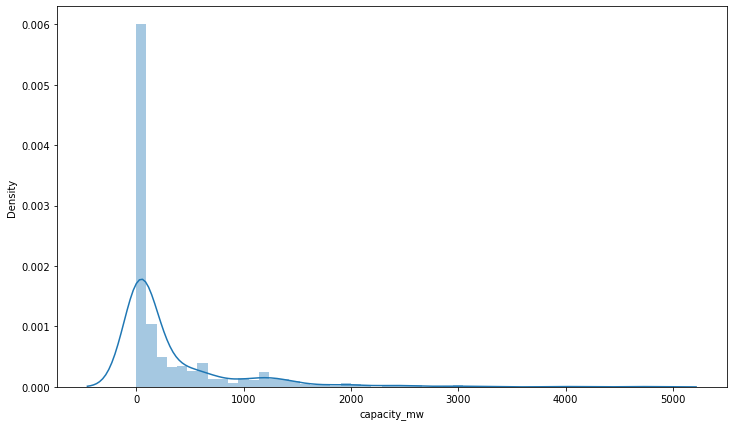



####################################################################################################


In [70]:
i=4 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

Above distrbution plot is positively skewed and maximum data distributed in 5 to 1200

column Name: latitude


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
len= 836


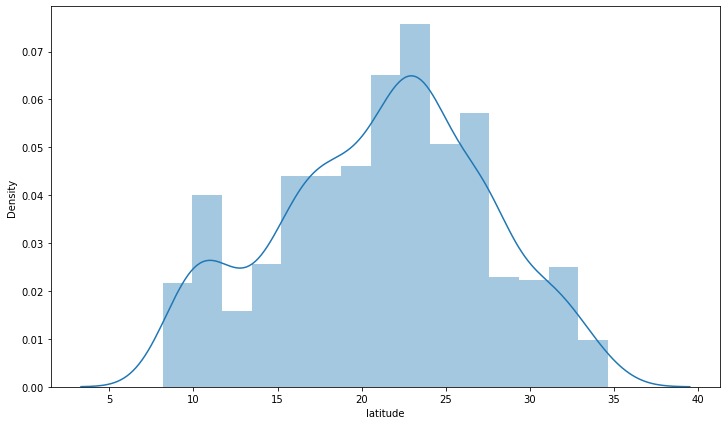



####################################################################################################


In [71]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

Above distribution curve seems like normal distribution curve.
latitude of the maximum power plant is between 15 to 27.

column Name: longitude


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64
len= 827


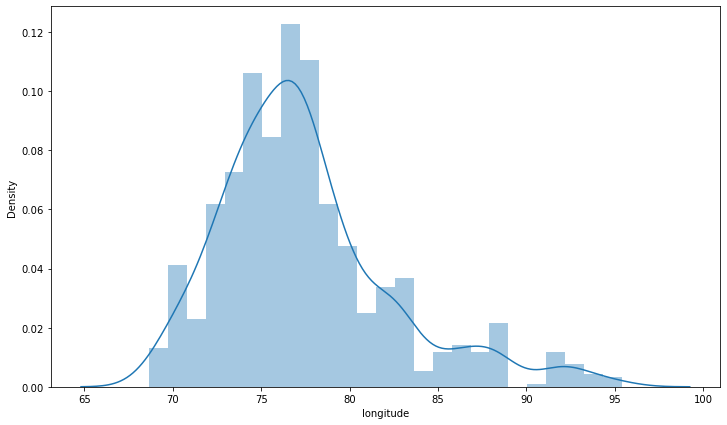



####################################################################################################


In [73]:
i=6 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

The Distribution curve looks like normal distribution curve
and maximum data of Lognuitude column is between 73 to 80

column Name: commissioning_year


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64
len= 73


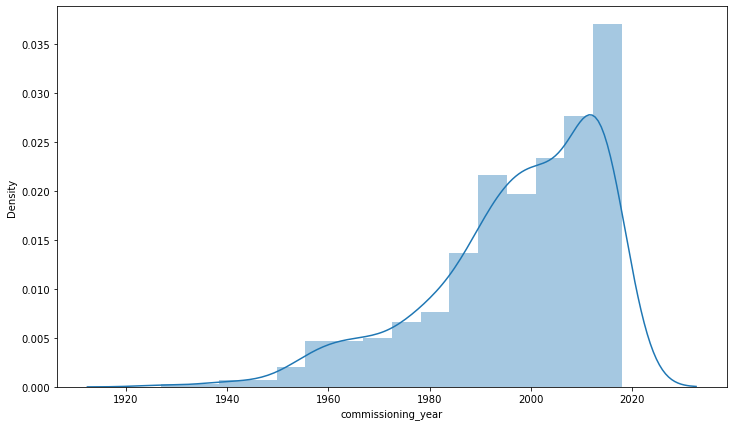



####################################################################################################


In [74]:
i=8 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since tails of the curve presents in left side,data of the columns negatively skewed

column Name: year_of_capacity_data


2019.0    519
Name: year_of_capacity_data, dtype: int64
len= 1


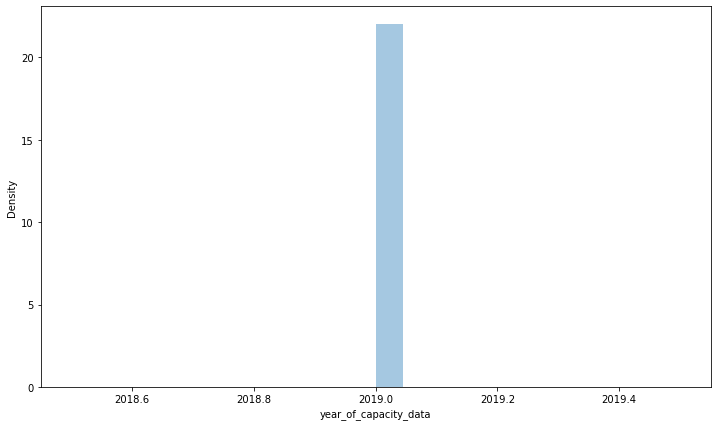



####################################################################################################


In [75]:
i=13 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since length of the unique value of year_of_capacity_data column is 1,we drop it

In [76]:
#appending "year_of_capacity_data" column in drop_columns list
drop_columns.append("year_of_capacity_data")

column Name: generation_gwh_2014


0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64
len= 371


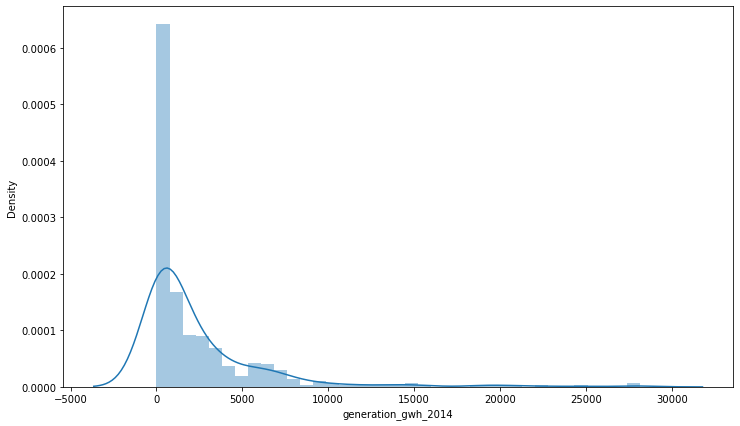



####################################################################################################


In [77]:
i=14 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

The Data of above columns positively skewed.

column Name: generation_gwh_2015


0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64
len= 396


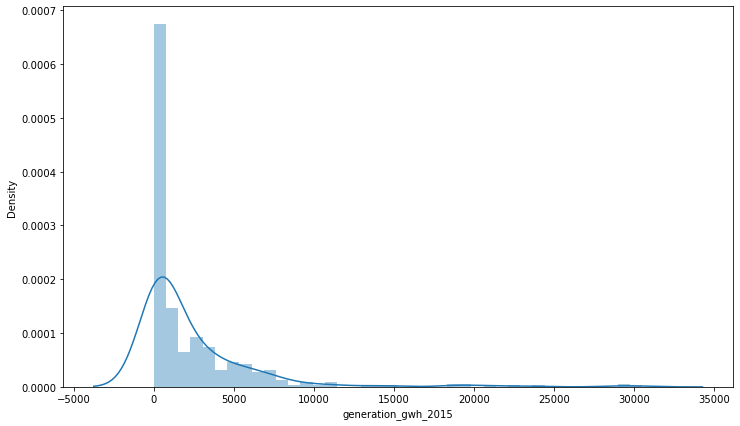



####################################################################################################


In [78]:
i=15 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: generation_gwh_2016


0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64
len= 403


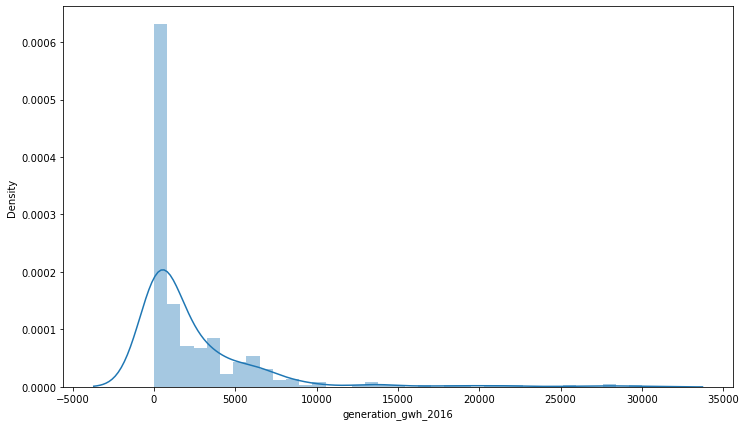



####################################################################################################


In [79]:
i=16 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: generation_gwh_2017


0.00000        32
170.08530       2
663.77450       1
1632.36715      1
272.73945       1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 408, dtype: int64
len= 408


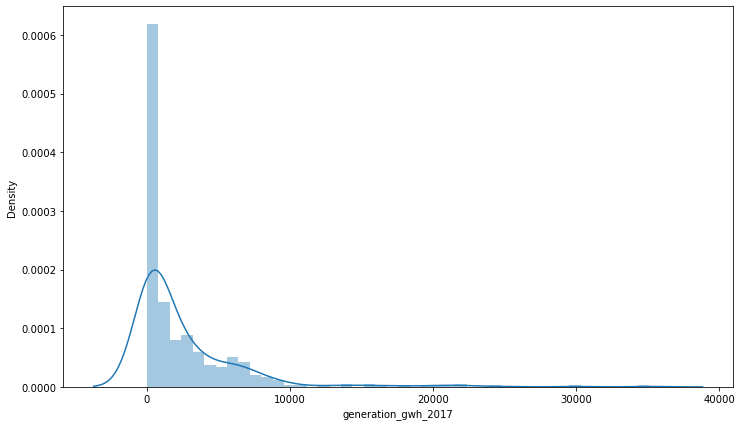



####################################################################################################


In [80]:
i=17 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: generation_gwh_2018


0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64
len= 410


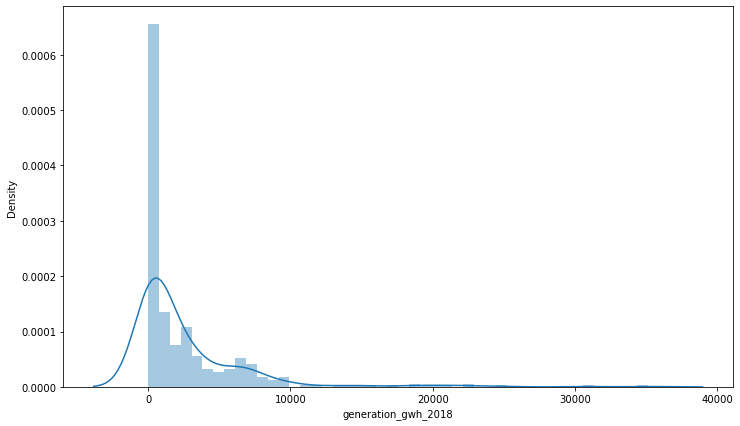



####################################################################################################


In [81]:
i=18 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we see from the above 5 distribution plot that the data of generationgwth(2014,2015,2016,2017,2018) is positively skewed.
maximum value of all 5 columns are NaN value

# Bivariate Analysis:

In [82]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

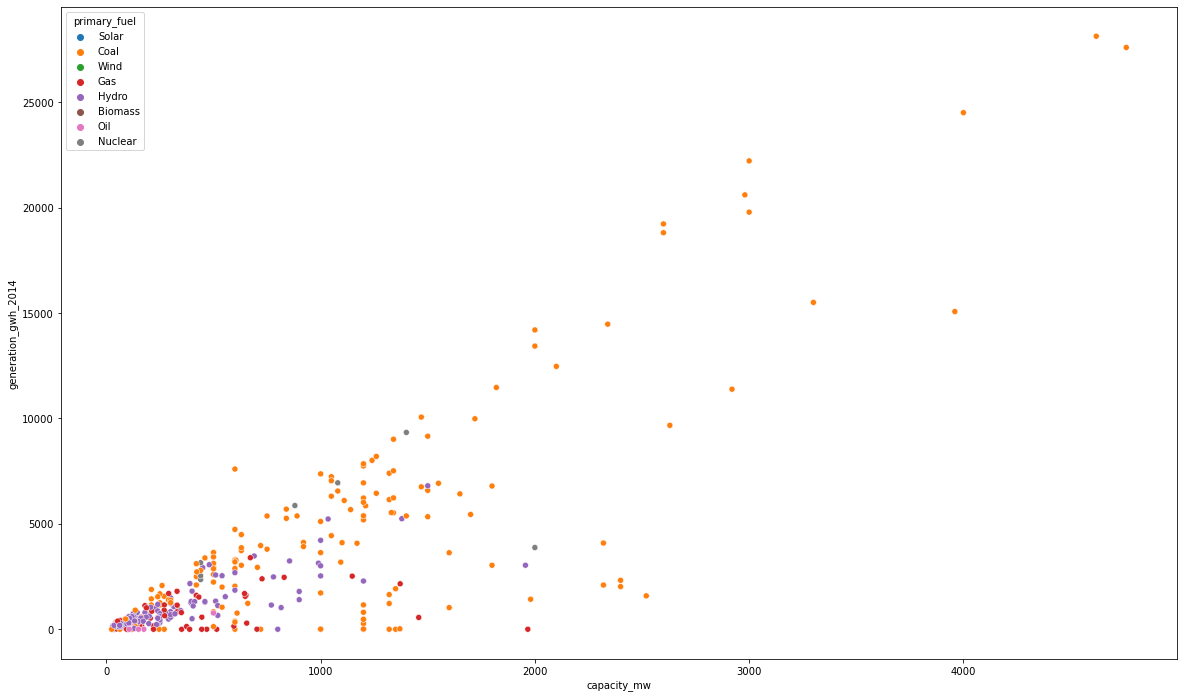

In [83]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

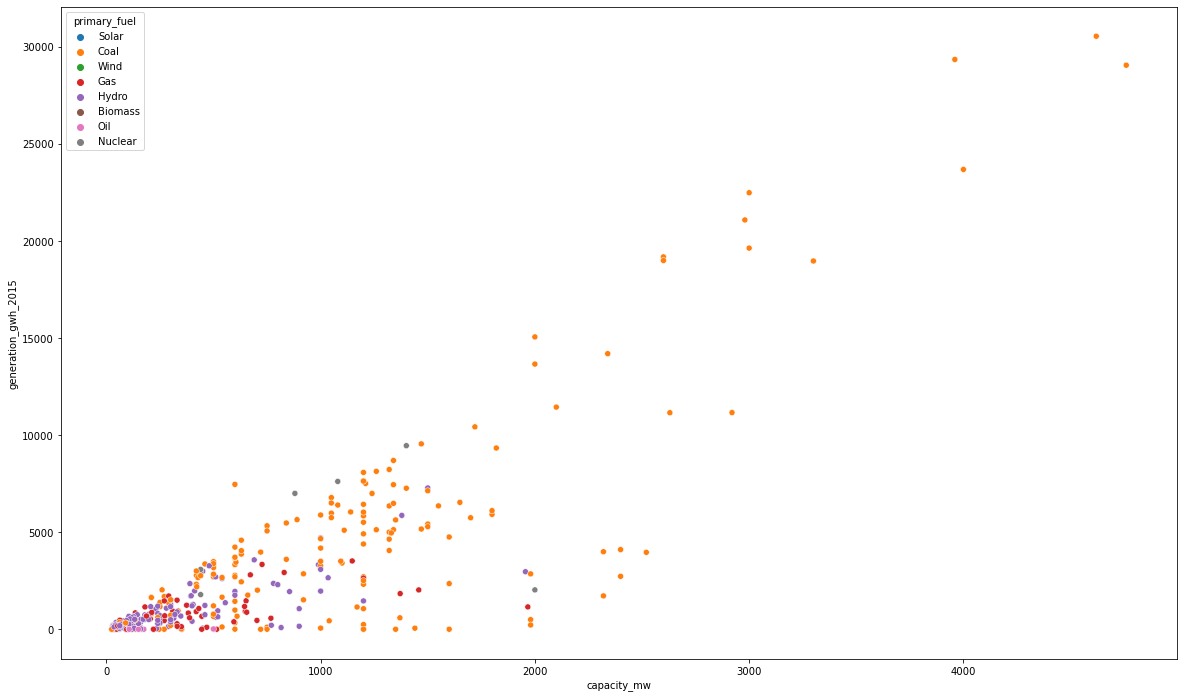

In [84]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

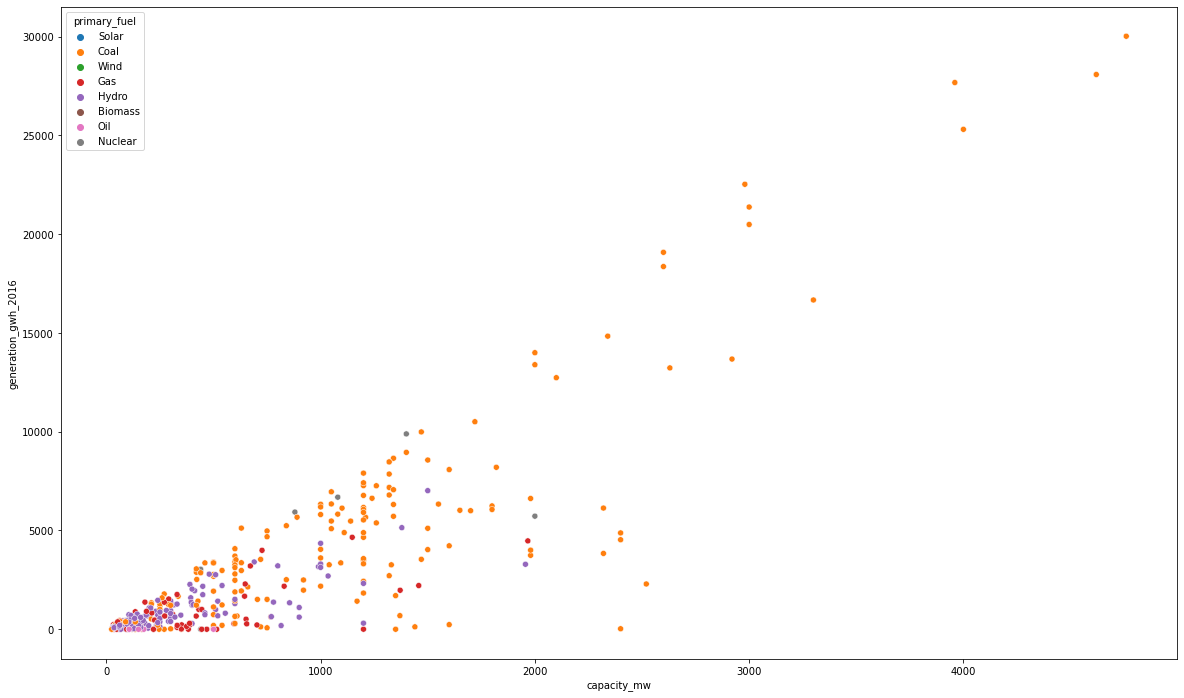

In [85]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

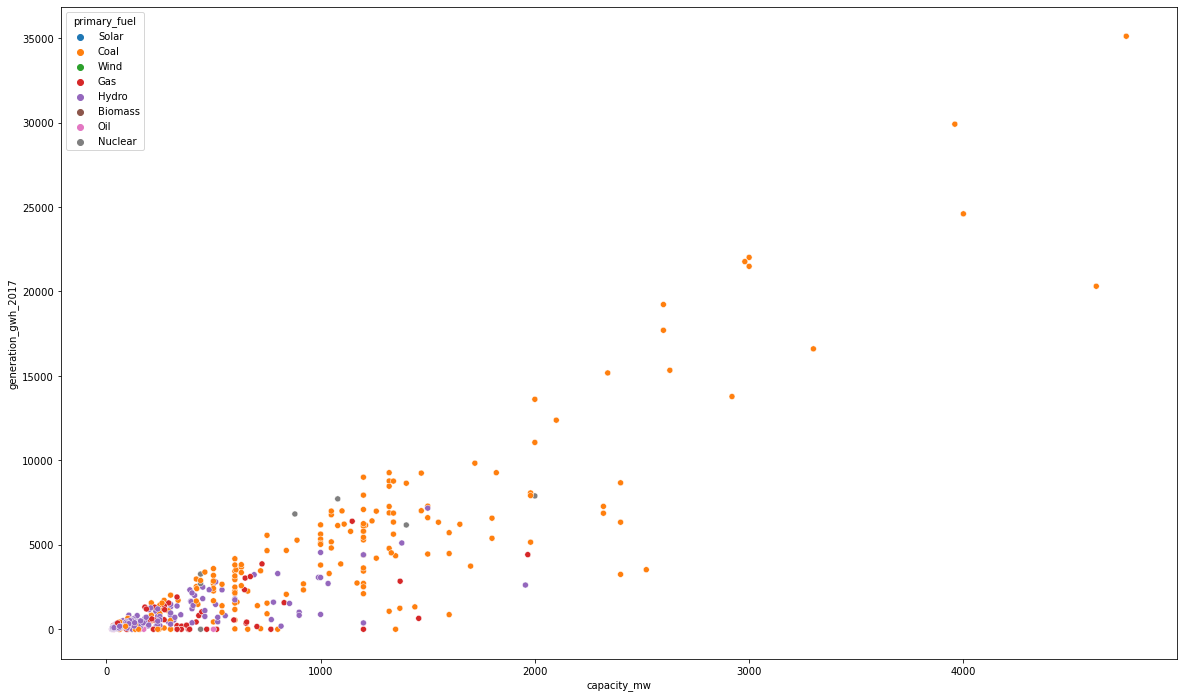

In [86]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

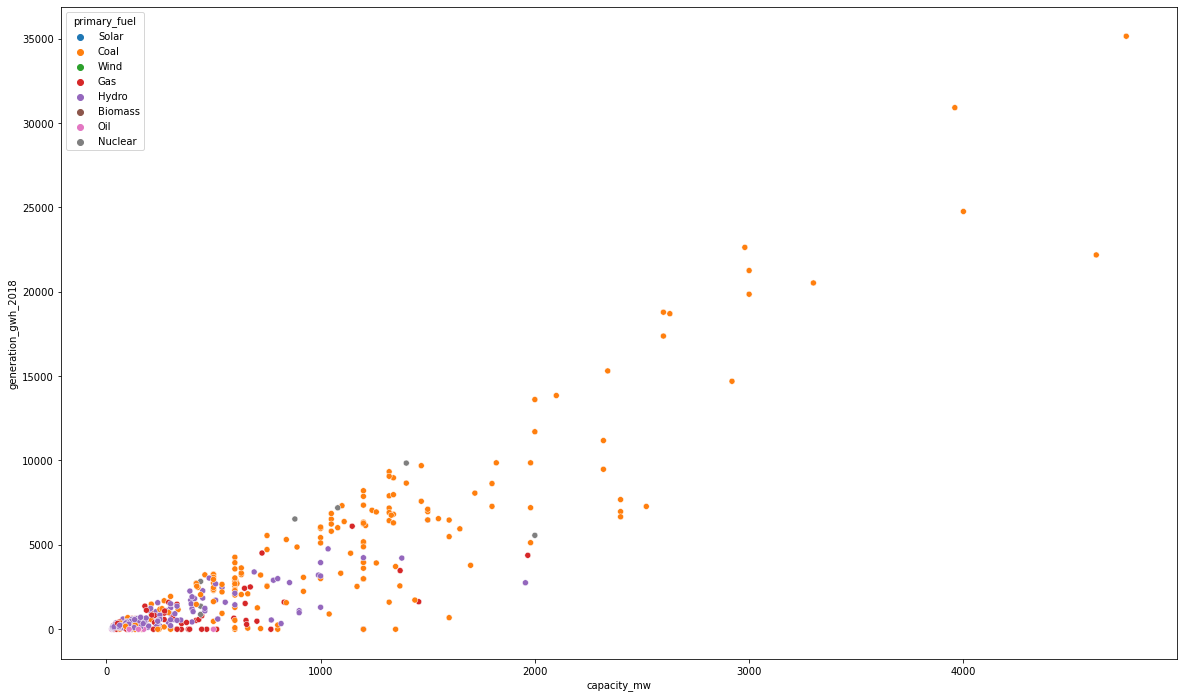

In [87]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',hue='primary_fuel',data=df)

In generation growth '2014,2015,2016,2017,2018',all powerplant's(except coal power plant) capacity is less than 2500. A few power plants whose primary fuel coal capacity is extremely high compared to other power plants.

<AxesSubplot:xlabel='capacity_mw', ylabel='commissioning_year'>

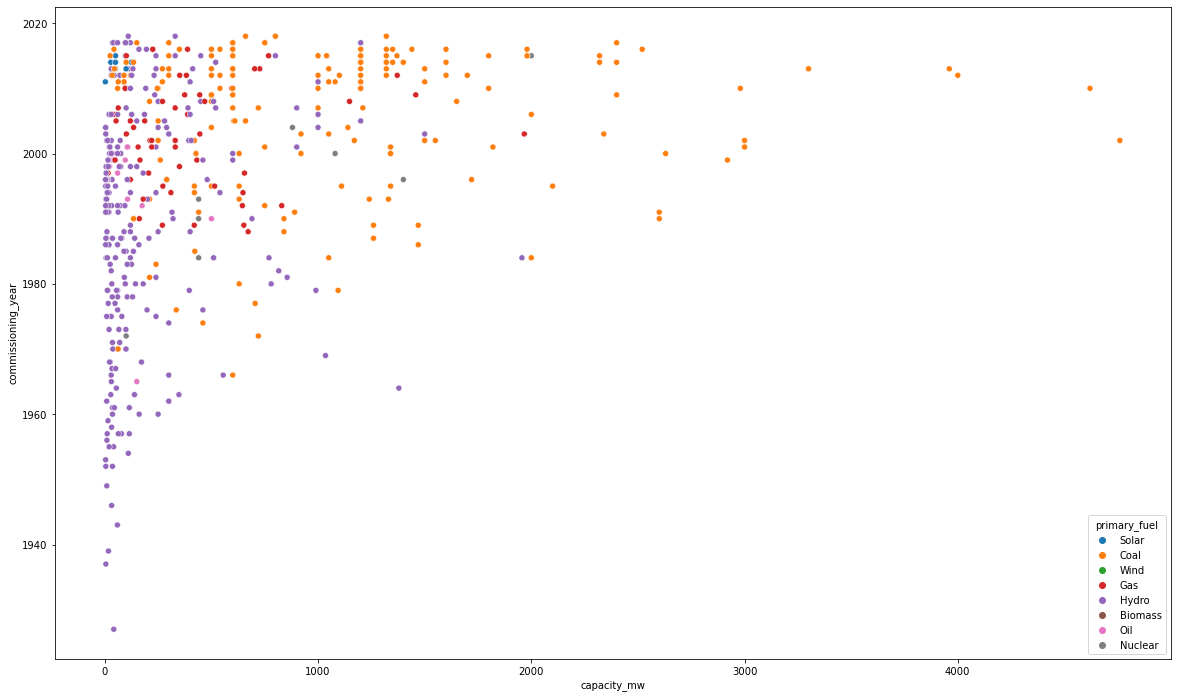

In [88]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='capacity_mw',y='commissioning_year',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

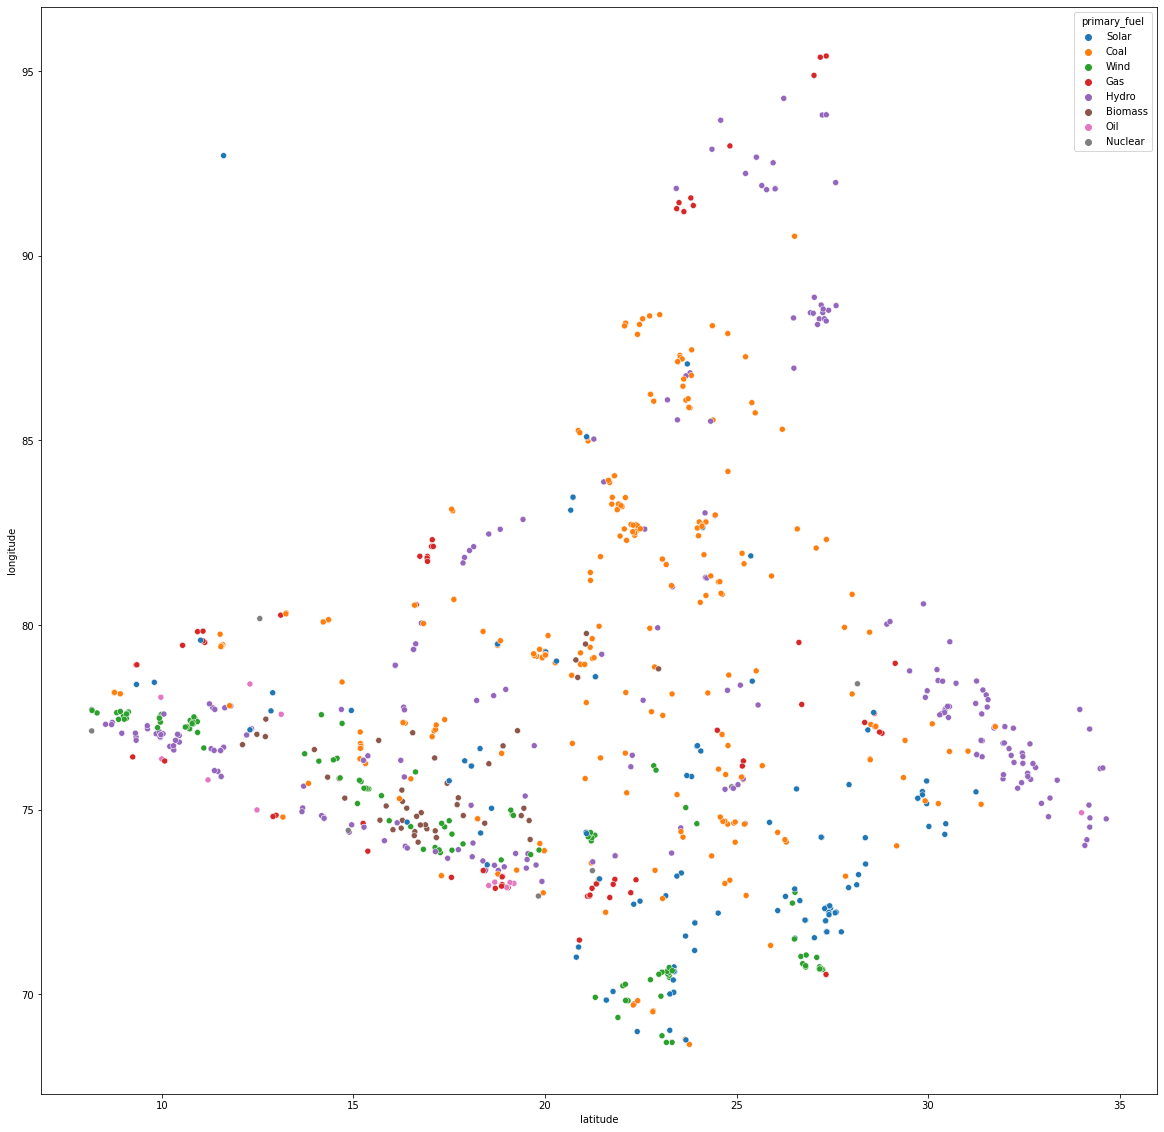

In [89]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='latitude',y='longitude',hue='primary_fuel',data=df)

above graph show that
each powerplant location by latitude and lognitude
The primary fuel of each power plant is displayed by different colors.

Multivariate Analysis:

<Figure size 864x504 with 0 Axes>

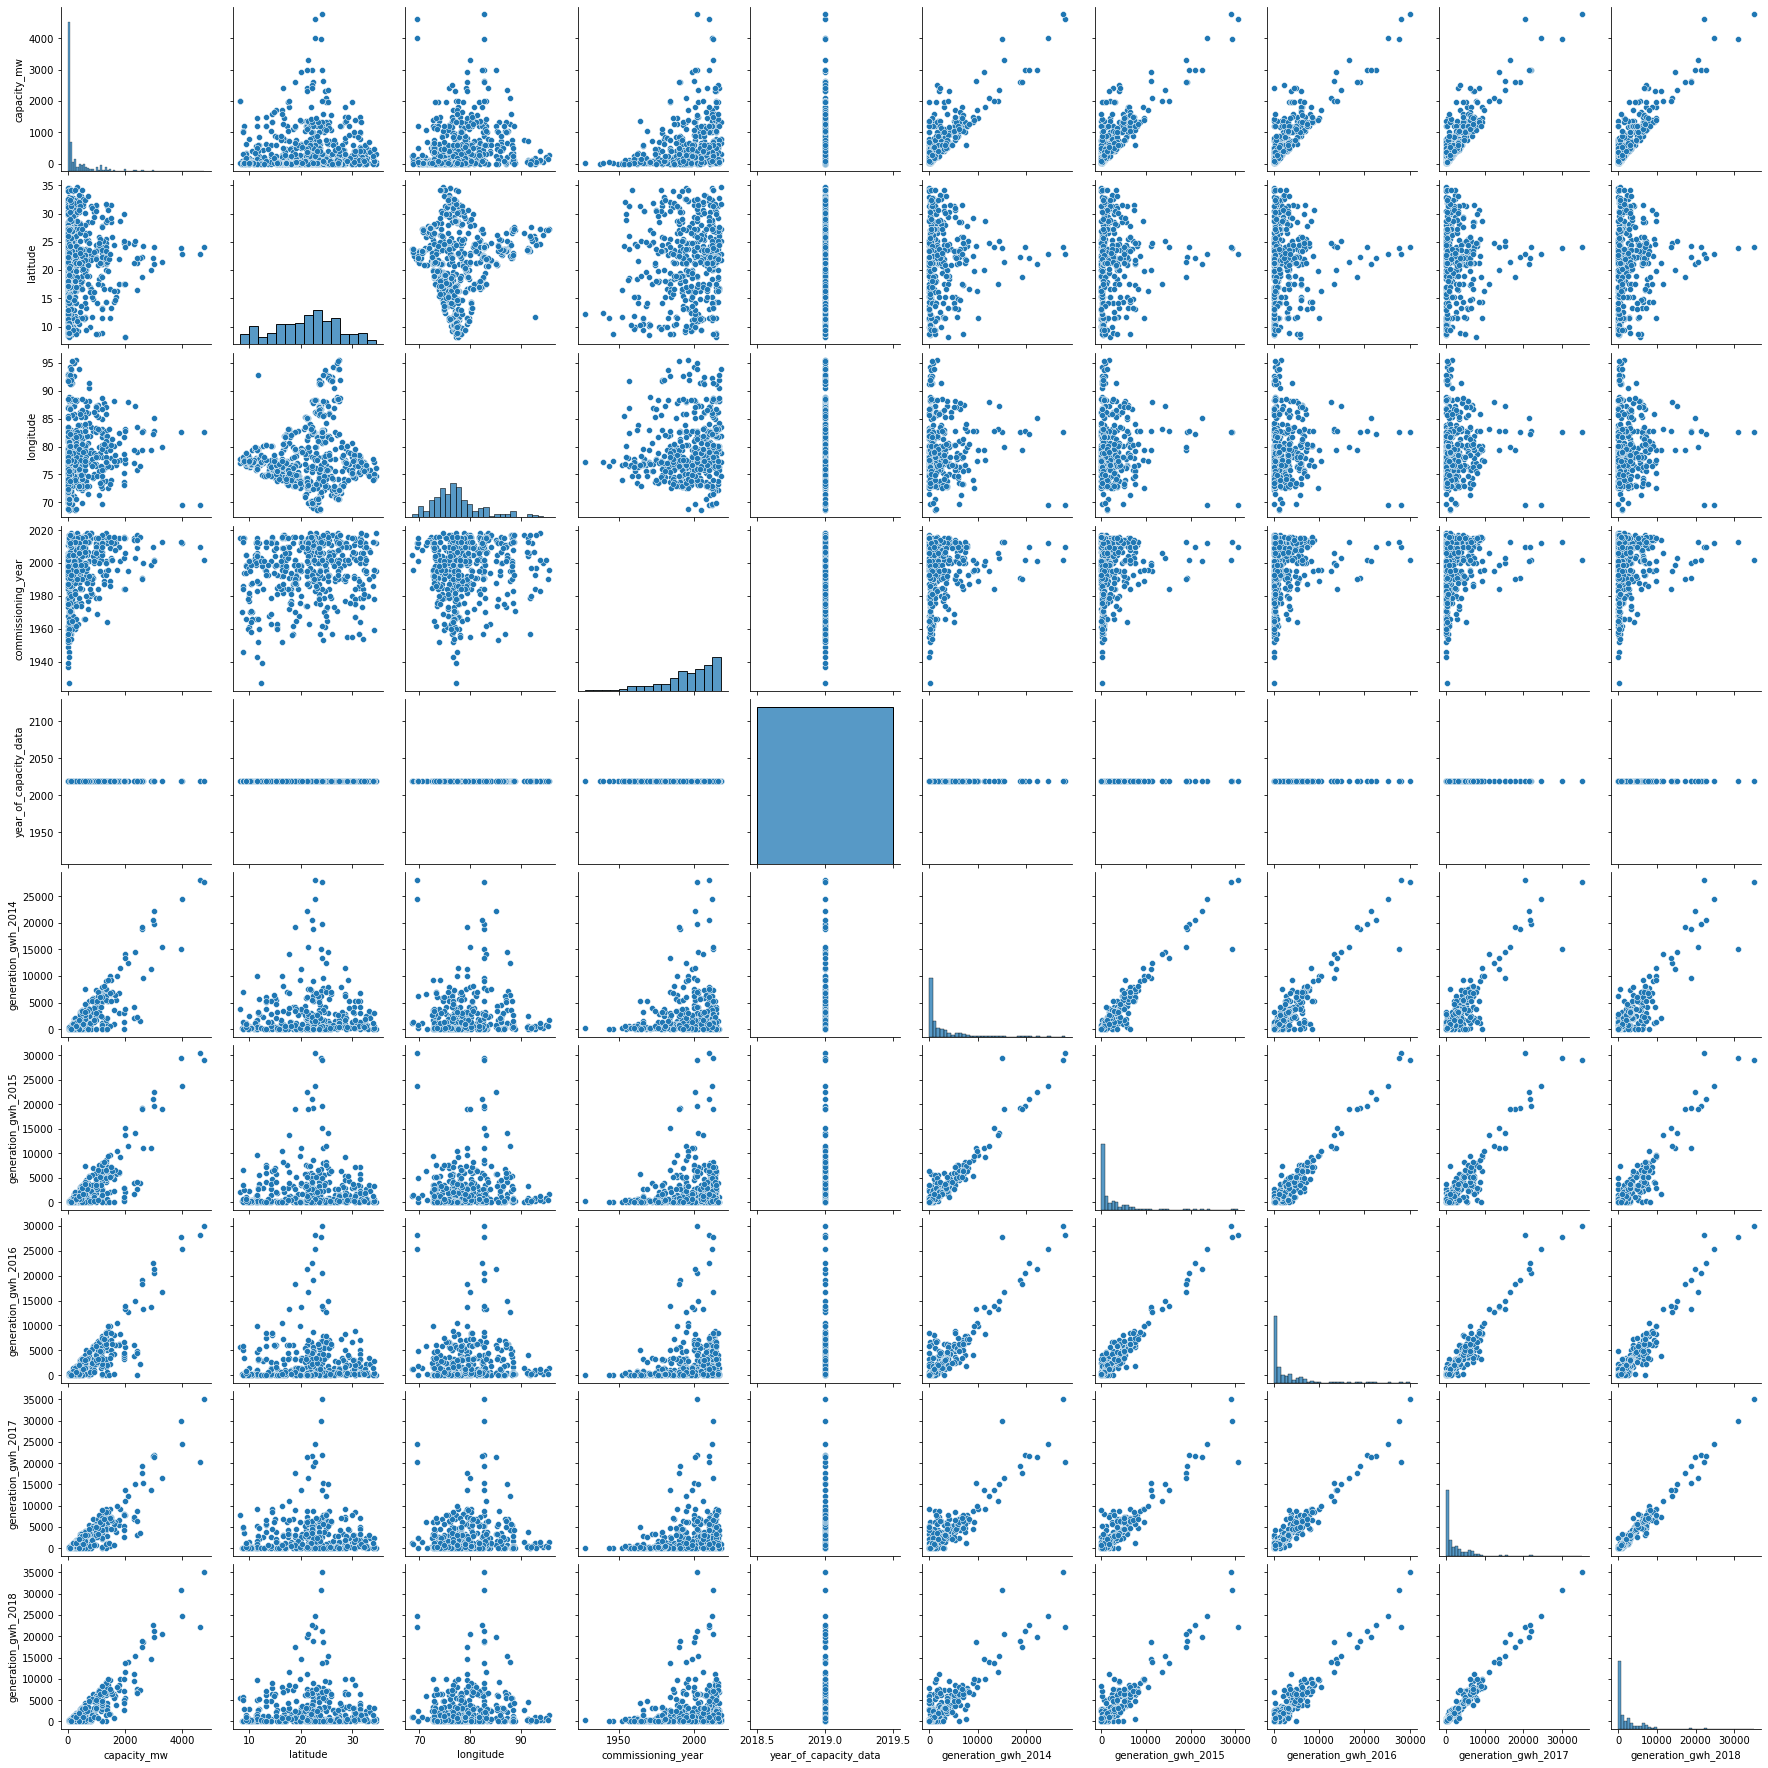

In [90]:
plt.figure(figsize=(12,7))
sns.pairplot(df)

pair of linear relation columns:
generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018, generation_gwh_2014,generation_gwh_2014 Vs capasity_mw generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018, generation_gwh_2014,generation_gwh_2014 Vs commissioning_year generation_gwh_2014 Vs other 4 years generation growth
generation_gwh_2015 Vs other 4 years generation growth
generation_gwh_2016 Vs other 4 years generation growth
generation_gwh_2017 Vs other 4 years generation growth
generation_gwh_2018 Vs other 4 years generation growth

pair of no relation columns:
generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018, generation_gwh_2014,generation_gwh_2014 vs latitude generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018, generation_gwh_2014,generation_gwh_2014 vs longitude

since,"latitude" and "longitude" columns are represent the unique location of each power plant,we drop this two column.

In [91]:
#appending "latitude" column in drop_columns list
drop_columns.append("latitude")

In [92]:
#appending "longitude" column in drop_columns list
drop_columns.append("longitude")

In [93]:
drop_columns

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'owner',
 'source',
 'url',
 'generation_data_source',
 'year_of_capacity_data',
 'latitude',
 'longitude']

In [94]:
df=df.drop(drop_columns,axis=1)

In [95]:
df.iloc[19,:]

capacity_mw               10.0
primary_fuel           Biomass
commissioning_year         NaN
geolocation_source         WRI
generation_gwh_2014        NaN
generation_gwh_2015        NaN
generation_gwh_2016        NaN
generation_gwh_2017        NaN
generation_gwh_2018        NaN
Name: 19, dtype: object

In [96]:
df.shape

(907, 9)

In [97]:
#Now checking null values
df.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [98]:
#Filling the missing Value of commissioning_year column
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df["commissioning_year"]=imp.fit_transform(df["commissioning_year"].values.reshape(-1,1))

In [99]:
#Filling the missing Value of geolocation_source column
df["geolocation_source"]=imp.fit_transform(df["geolocation_source"].values.reshape(-1,1))

In [100]:
df.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Biomass            NaN
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Solar              NaN
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [103]:
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2014'].fillna(4737.279310),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2014'].fillna(756.601441),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2014'].fillna(780.429852),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2014'].fillna(4867.556164),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2014'].fillna(130.881366),df['generation_gwh_2014']  )

In [104]:
df["generation_gwh_2014"].isnull().sum()

300

In [107]:
imp_mean=SimpleImputer(strategy="mean")
df["generation_gwh_2014"]=imp_mean.fit_transform(df["generation_gwh_2014"].values.reshape(-1,1))

In [108]:
#Filling the missing Value of generation_gwh_2015 column

In [109]:
df.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Biomass            NaN
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Solar              NaN
Wind               NaN
Name: generation_gwh_2015, dtype: float64

In [111]:
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2015'].fillna(4649.585751),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2015'].fillna(840.159648),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2015'].fillna(709.991238),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2015'].fillna(4234.875000),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2015'].fillna(21.710086),df['generation_gwh_2015']  )

In [112]:
df["generation_gwh_2015"].isnull().sum()

300

In [113]:
df["generation_gwh_2015"]=imp_mean.fit_transform(df["generation_gwh_2015"].values.reshape(-1,1))

In [114]:
df.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Biomass            NaN
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Solar              NaN
Wind               NaN
Name: generation_gwh_2016, dtype: float64

In [116]:
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2016'].fillna(4761.233946),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2016'].fillna(826.305503),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2016'].fillna(699.318079),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2016'].fillna(4272.608750),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2016'].fillna(4.796871),df['generation_gwh_2016']  )

In [117]:
df["generation_gwh_2016"].isnull().sum()

300

In [118]:
df["generation_gwh_2016"]=imp_mean.fit_transform(df["generation_gwh_2016"].values.reshape(-1,1))

In [119]:
df.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Biomass            NaN
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Solar              NaN
Wind               NaN
Name: generation_gwh_2017, dtype: float64

In [121]:
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2017'].fillna(4870.537285),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2017'].fillna(881.216187),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2017'].fillna(693.884741),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2017'].fillna(4323.415000),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2017'].fillna(0.167471),df['generation_gwh_2017']  )

In [122]:
df["generation_gwh_2017"].isnull().sum()

300

In [123]:
df["generation_gwh_2017"]=imp_mean.fit_transform(df["generation_gwh_2017"].values.reshape(-1,1))

In [124]:
df.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Biomass            NaN
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Solar              NaN
Wind               NaN
Name: generation_gwh_2018, dtype: float64

In [126]:
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2018'].fillna(5036.420635),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2018'].fillna(846.658418),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2018'].fillna(737.636455),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2018'].fillna(4277.031250),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2018'].fillna(0.295215),df['generation_gwh_2018']  )

In [127]:
df["generation_gwh_2018"].isnull().sum()

300

In [128]:
df["generation_gwh_2018"]=imp_mean.fit_transform(df["generation_gwh_2018"].values.reshape(-1,1))

In [129]:
df.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [130]:
#Checking Correlation
df.corr()

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.004072,0.681633,0.695703,0.721520,0.735477,0.747450
commissioning_year,-0.004072,1.000000,0.198253,0.196086,0.216906,0.220009,0.220766
generation_gwh_2014,0.681633,0.198253,1.000000,0.943371,0.923992,0.897397,0.889376
generation_gwh_2015,0.695703,0.196086,0.943371,1.000000,0.971335,0.932508,0.926584
generation_gwh_2016,0.721520,0.216906,0.923992,0.971335,1.000000,0.965492,0.955782
generation_gwh_2017,0.735477,0.220009,0.897397,0.932508,0.965492,1.000000,0.985594
generation_gwh_2018,0.747450,0.220766,0.889376,0.926584,0.955782,0.985594,1.000000


<AxesSubplot:>

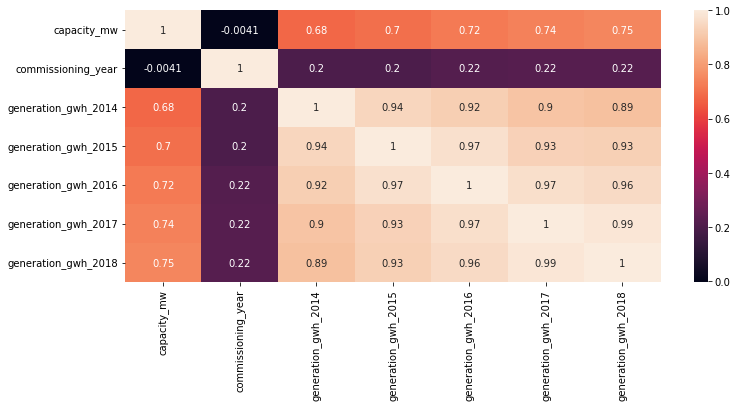

In [131]:
#checking corrleation using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [132]:
#Checking Skewness
df.skew()

capacity_mw            3.123576
commissioning_year    -1.714873
generation_gwh_2014    4.141894
generation_gwh_2015    4.673660
generation_gwh_2016    4.424120
generation_gwh_2017    4.486435
generation_gwh_2018    4.347453
dtype: float64

we have to control the skewness of the numerival column of the DataFrame

# Checking VIF SCORE

In [133]:
num_columns

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [135]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [136]:
#find the same columns between "numerical_columns" And "df.columns" and make a DataFrame
p=df[['capacity_mw',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']]

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_clac():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif['Features']=p.columns
    print(vif)
    

In [140]:
vif_clac()

   VIF Factor             Features
0    2.983519          capacity_mw
1    1.824153   commissioning_year
2   16.597834  generation_gwh_2014
3   40.433740  generation_gwh_2015
4   57.511189  generation_gwh_2016
5   77.210175  generation_gwh_2017
6   61.991998  generation_gwh_2018


we see that multicolinearty exists
since we have not more columns to determine the target variable,we can not omitted any column

# Label Encoding

In [141]:
df.nunique().to_frame('unique values')

,unique values
capacity_mw,361
primary_fuel,8
commissioning_year,73
geolocation_source,3
generation_gwh_2014,377
generation_gwh_2015,402
generation_gwh_2016,409
generation_gwh_2017,414
generation_gwh_2018,416


In [142]:
list=['primary_fuel','commissioning_year','geolocation_source']

In [143]:
from sklearn.preprocessing import LabelEncoder

In [145]:
le = LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i]).astype(float)

In [146]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6.0,65.0,1.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,98.0,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,39.2,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,135.0,2.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1.0,69.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Checking outliers

In [148]:
list_o=['capacity_mw',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

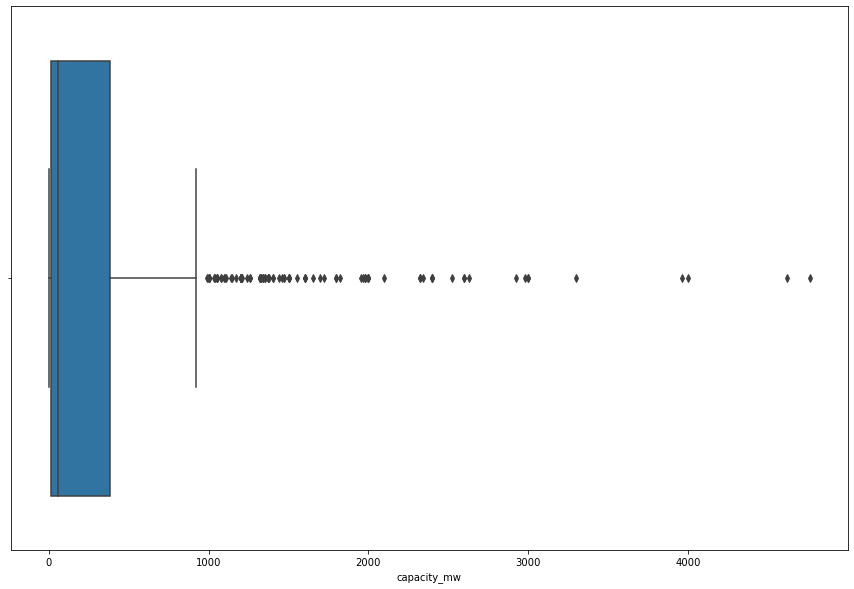

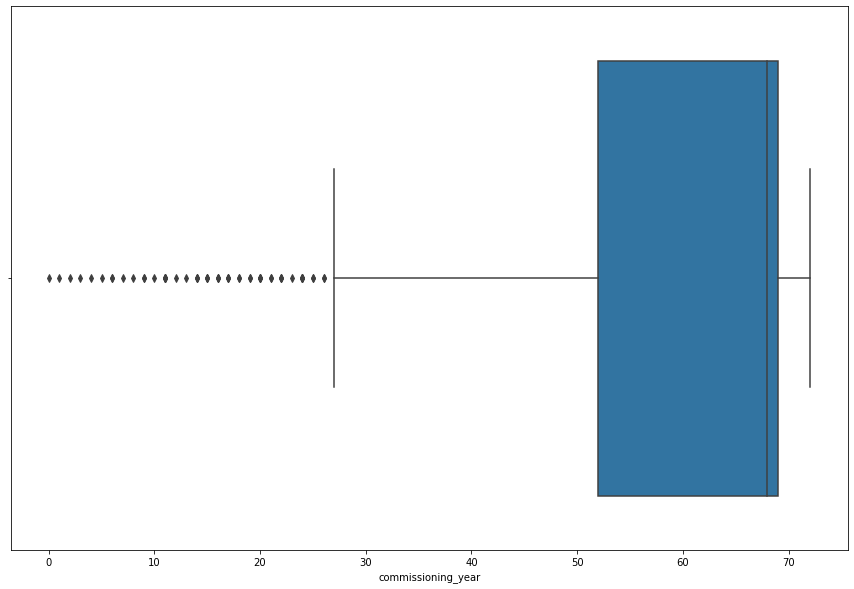

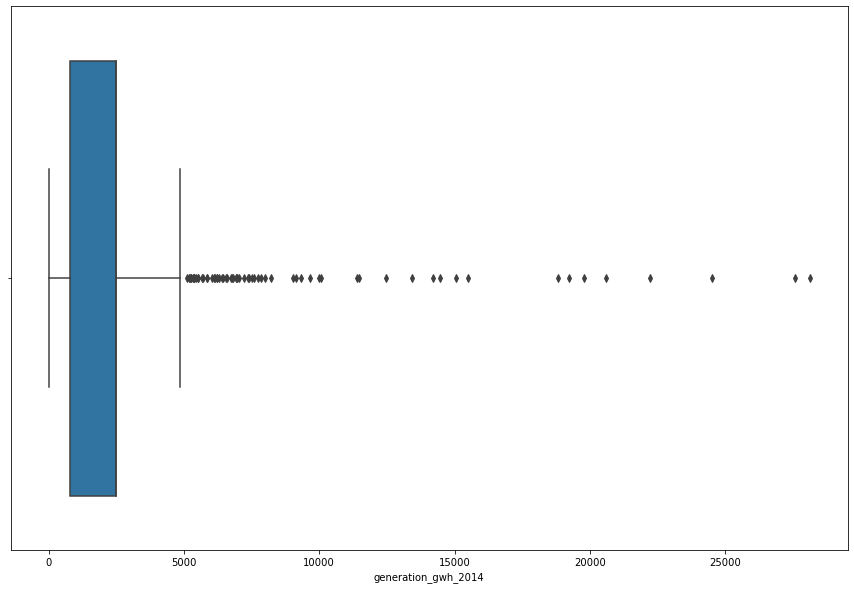

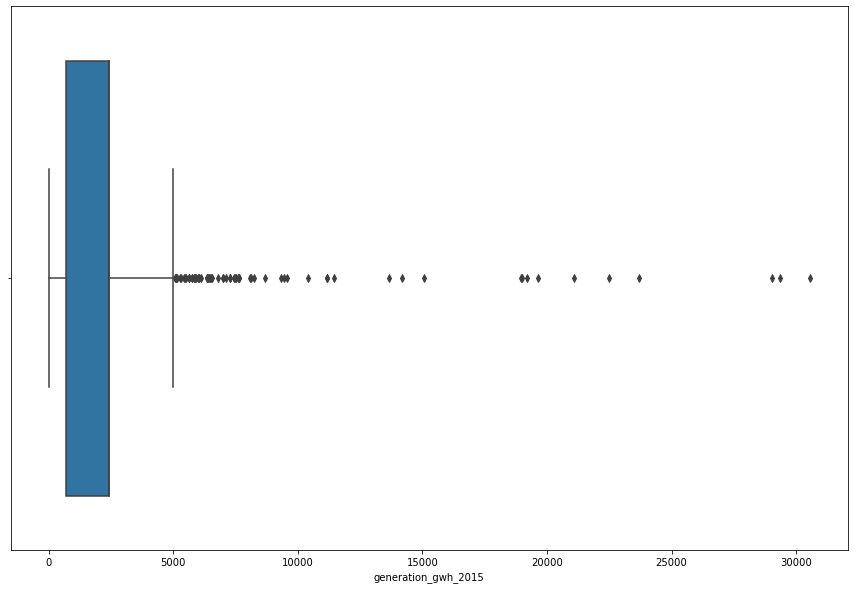

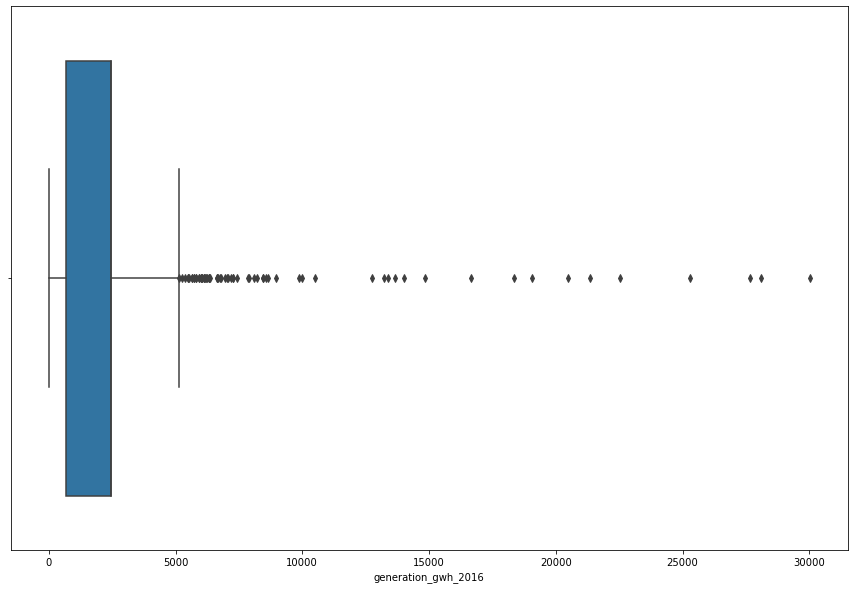

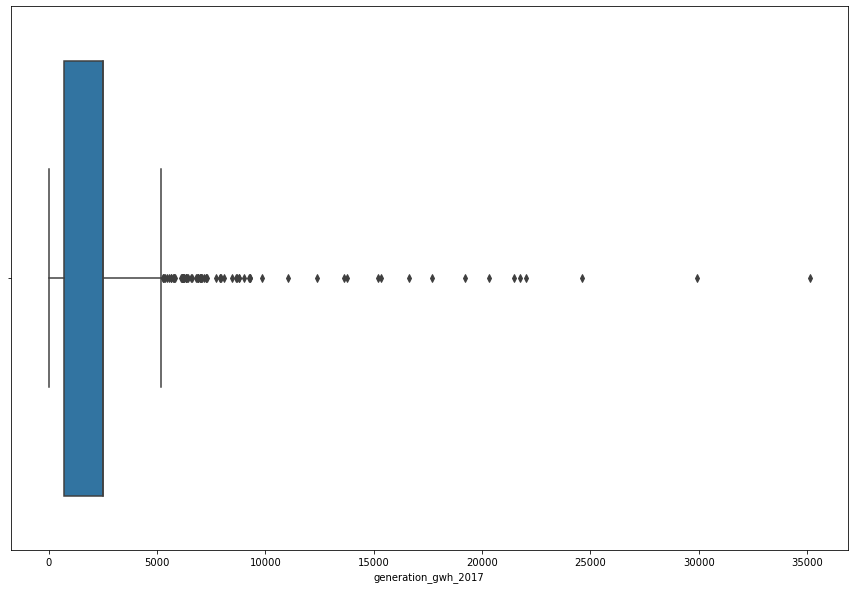

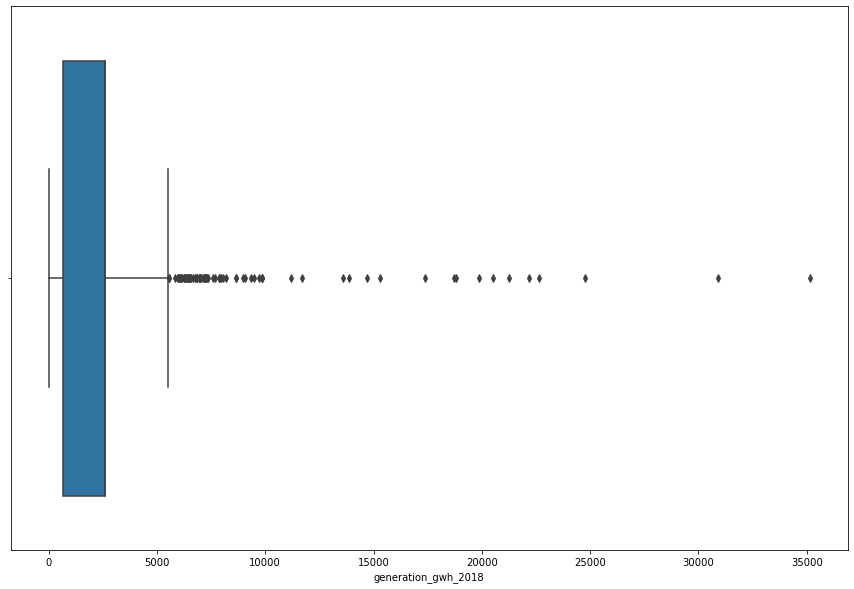

In [150]:
for i in list_o:
    plt.figure(figsize=(15,10))
    sns.boxplot(df[i])
    plt.show()

We can see from all the box plots above that there are many outliers in each column.we need to remove this outliers to get beter model accuracy score.

# Remove The Outliers From The DataFrame By Zscore:

In [151]:
#import zscore
from scipy.stats import zscore

In [152]:
outliers_columns=df[["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]]

In [153]:
z=np.abs(zscore(outliers_columns))
z

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.604536e-16,0.000000,0.000000,0.000000,0.000000
1,7.898478e-01,0.741563,0.760582,0.768443,0.768716
2,1.604536e-16,0.000000,0.000000,0.000000,0.000000
3,6.636781e-01,0.529316,0.525998,0.607653,0.625818
4,1.894076e-01,1.164579,1.252529,0.936921,1.477837
...,...,...,...,...,...
902,7.898478e-01,0.810735,0.742598,0.541699,0.606763
903,1.604536e-16,0.000000,0.000000,0.000000,0.000000
904,1.604536e-16,0.000000,0.000000,0.000000,0.000000
905,7.898478e-01,0.741563,0.760582,0.768443,0.768716


In [154]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15, 143, 143, 143, 143, 158, 209, 209, 209, 209, 209,
       308, 308, 308, 308, 308, 364, 364, 364, 364, 364, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 648, 648, 648, 648, 648, 657,
       657, 657, 657, 657, 695, 695, 695, 695, 695, 721, 721, 721, 724,
       724, 724, 724, 724, 726, 726, 726, 726, 726, 786, 786, 786, 786,
       786, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880], dtype=int64), array([2, 3, 4, 0, 2, 3, 4, 0, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))


In [155]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6.0,65.0,1.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,98.0,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,39.2,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,135.0,2.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1.0,69.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,1.0,70.0,2.0,4737.279310,0.994875,233.596650,865.400000,686.500000
903,3.0,6.0,69.0,0.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
904,25.5,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
905,80.0,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635


In [156]:
print(df.shape)
print(df_new.shape)

(907, 9)
(890, 9)


In [157]:
percentage_of_dataloss=((907-890)/907)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 1.8743109151047408


# Target Variable:primary_fuel
    
Dividing data in features and vectors:

In [158]:
x=df_new.drop("primary_fuel",axis=1) #Independent variable
y=df_new.iloc[:,1] #Dependent variable

In [159]:
x

,capacity_mw,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,65.0,1.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,98.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,39.2,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,135.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,69.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,1600.0,70.0,2.0,4737.279310,0.994875,233.596650,865.400000,686.500000
903,3.0,69.0,0.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
904,25.5,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
905,80.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635


In [160]:
y

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 890, dtype: float64

# Oversampling

In [161]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [163]:
x,y=smt.fit_resample(x,y)

In [166]:
x.value_counts()

capacity_mw  commissioning_year  geolocation_source  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  generation_gwh_2018
5.000000     69.0                0.0                 2498.743142          2428.863290          2470.332276          2521.386641          2605.373790            68
1.000000     69.0                0.0                 2498.743142          2428.863290          2470.332276          2521.386641          2605.373790            37
10.000000    69.0                2.0                 2498.743142          2428.863290          2470.332276          2521.386641          2605.373790            29
24.000000    69.0                2.0                 2498.743142          2428.863290          2470.332276          2521.386641          2605.373790            27
16.000000    69.0                2.0                 2498.743142          2428.863290          2470.332276          2521.386641          2605.373790            21
                            

In [168]:
y.value_counts()

6.0    251
1.0    251
7.0    251
2.0    251
3.0    251
0.0    251
5.0    251
4.0    251
Name: primary_fuel, dtype: int64

# Transforming data to remove skewness:

In [172]:
from sklearn.preprocessing import power_transform

In [174]:
x=power_transform(x,method='yeo-johnson')
x

array([[-1.78248707,  0.2347888 , -2.55324922, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [ 0.21363933,  0.80269209,  0.37399658, ...,  1.15985742,
         1.12473827,  1.15833823],
       [-0.29329075,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       ...,
       [-1.33094386,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [-1.38681743,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [ 0.31199593,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ]])

In [175]:
df_new1=pd.DataFrame(x)
df_new1.skew()

0    0.025557
1   -0.712131
2   -2.305944
3   -0.364257
4   -0.378115
5   -0.463022
6   -0.535255
7   -0.519366
dtype: float64

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.78248707,  0.2347888 , -2.55324922, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [ 0.21363933,  0.80269209,  0.37399658, ...,  1.15985742,
         1.12473827,  1.15833823],
       [-0.29329075,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       ...,
       [-1.33094386,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [-1.38681743,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [ 0.31199593,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ]])

# Model Building

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [179]:
x.shape


(2008, 8)

In [181]:
# findind random_state
maxAccu=0
maxRS=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is :',maxAccu,'Random state:',maxRS)        

Best accuracy is : 0.7396351575456053 Random state: 989


In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=989)

In [183]:
x_train

array([[-0.75356922,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [-0.10908672, -1.08680134,  0.37399658, ..., -1.70777413,
        -1.75864067, -1.77558832],
       [ 0.07714539, -1.45162247,  0.37399658, ..., -1.70376212,
        -1.75663094, -1.77506503],
       ...,
       [ 0.24607418, -0.74495556,  0.37399658, ..., -1.79680139,
        -1.76544365, -1.78397357],
       [ 0.32353949,  0.36811425,  0.37399658, ..., -1.80956485,
        -1.7731726 , -1.78486374],
       [ 1.5539416 ,  0.50710493,  0.37399658, ...,  1.81345177,
         1.10566088,  1.58979721]])

In [184]:
x_test

array([[ 0.43566066, -0.91139118,  0.37399658, ..., -1.54057466,
        -1.689581  , -1.52602278],
       [ 1.60309618, -0.52430706,  0.37399658, ...,  0.9052918 ,
         0.84951562,  0.70438021],
       [-0.5923541 ,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       ...,
       [-0.54642601,  0.80269209,  0.37399658, ...,  1.15985742,
         1.12473827,  1.15833823],
       [-0.7810621 ,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ],
       [ 0.22464082,  0.80269209,  0.37399658, ...,  0.47304688,
         0.4704223 ,  0.492311  ]])

In [185]:
y_train

1000    0.0
1635    5.0
1611    5.0
857     2.0
1534    5.0
       ... 
376     3.0
155     1.0
1747    5.0
220     1.0
329     1.0
Name: primary_fuel, Length: 1405, dtype: float64

In [186]:
y_test

1165    2.0
1411    4.0
1994    7.0
1595    5.0
542     7.0
       ... 
1725    5.0
1798    6.0
409     1.0
606     7.0
743     7.0
Name: primary_fuel, Length: 603, dtype: float64

In [188]:
print('x_train shape=',x_train.shape)
print('x_test shape=',x_train.shape)
print('y_train shape=',y_train.shape)
print('y_test shape=',y_test.shape)

x_train shape= (1405, 8)
x_test shape= (1405, 8)
y_train shape= (1405,)
y_test shape= (603,)


In [189]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [190]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [191]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.7396351575456053
[[68  0  0  0  0  0  0  3]
 [ 9 26  7  1 15  2  0 10]
 [ 4  1 45 11  5  6  0  0]
 [ 0  2  9 53  2  0  0  0]
 [ 0  9  0  0 66  0  0  0]
 [ 0  0  0  0  0 83  0  0]
 [ 0  1  0  0  0  0 83  0]
 [52  8  0  0  0  0  0 22]]
              precision    recall  f1-score   support

         0.0       0.51      0.96      0.67        71
         1.0       0.55      0.37      0.44        70
         2.0       0.74      0.62      0.68        72
         3.0       0.82      0.80      0.81        66
         4.0       0.75      0.88      0.81        75
         5.0       0.91      1.00      0.95        83
         6.0       1.00      0.99      0.99        84
         7.0       0.63      0.27      0.38        82

    accuracy                           0.74       603
   macro avg       0.74      0.74      0.72       603
weighted avg       0.75      0.74      0.72       603

######################################################################

# Checking Cross Val Score:

In [193]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.6752988047808764
cross validation score of GaussianNB() is = 0.74800796812749
cross validation score of SVC() is = 0.7554780876494024
cross validation score of DecisionTreeClassifier() is = 0.850597609561753
cross validation score of KNeighborsClassifier() is = 0.849601593625498
cross validation score of RandomForestClassifier() is = 0.8779880478087649
cross validation score of GradientBoostingClassifier() is = 0.8804780876494024
cross validation score of AdaBoostClassifier() is = 0.46065737051792827
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.6837672623429936
cross validation score of GaussianNB() is = 0.7465207594315418
cross validation score of SVC() is = 0.7669366173616224
cross validation score of DecisionTreeClassifier() is = 0.8530925343387695
cross validation score of KNeighborsClassifier() is 

# Parameter Tuning for RandomForestClassifier

In [194]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=7,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [195]:
gcv1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [196]:
final_model=gcv1.best_estimator_

In [197]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8872305140961857
Train Accuracy score of final model = 0.9202846975088967
[[71  0  0  0  0  0  0  0]
 [ 0 53  9  2  6  0  0  0]
 [ 0 16 17 38  1  0  0  0]
 [ 0  1  6 58  1  0  0  0]
 [ 0 47  0  0 28  0  0  0]
 [ 0 18  0  0  0 65  0  0]
 [ 1  0  0  0  0  0 83  0]
 [82  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63        71
         1.0       0.39      0.76      0.52        70
         2.0       0.53      0.24      0.33        72
         3.0       0.59      0.88      0.71        66
         4.0       0.78      0.37      0.50        75
         5.0       1.00      0.78      0.88        83
         6.0       1.00      0.99      0.99        84
         7.0       0.00      0.00      0.00        82

    accuracy                           0.62       603
   macro avg       0.59      0.63      0.57       603
weighted avg       0.60      0.62      0.57       603



# Target Variable:capacity_mw

#Dividing data in features and vectors:

In [198]:
df_new

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6.0,65.0,1.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,98.0,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,39.2,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,135.0,2.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1.0,69.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,1.0,70.0,2.0,4737.279310,0.994875,233.596650,865.400000,686.500000
903,3.0,6.0,69.0,0.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
904,25.5,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
905,80.0,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635


In [200]:
x=df_new.drop("capacity_mw",axis=1) #Independent variable
y=df_new.iloc[:,0] #Dependent variable

In [201]:
x

,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,6.0,65.0,1.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,2.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,69.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,1.0,70.0,2.0,4737.279310,0.994875,233.596650,865.400000,686.500000
903,6.0,69.0,0.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
904,7.0,69.0,2.0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
905,1.0,69.0,2.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635


In [202]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 890, dtype: float64

In [203]:
print(x.shape)
print(y.shape)

(890, 8)
(890,)


In [204]:
#checking skewness
x.skew()

primary_fuel           0.442449
commissioning_year    -1.626922
geolocation_source    -2.127830
generation_gwh_2014    1.024369
generation_gwh_2015    1.071199
generation_gwh_2016    1.092445
generation_gwh_2017    1.063161
generation_gwh_2018    1.138028
dtype: float64

# Transforming data to remove skewness

In [206]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.16154191, -0.03769335, -2.49572719, ...,  0.36587124,
         0.36128687,  0.36742572],
       [-1.01569445,  0.83096958,  0.40045606, ...,  1.31454684,
         1.30342313,  1.29755881],
       [ 1.44613028,  0.83096958,  0.40045606, ...,  0.36587124,
         0.36128687,  0.36742572],
       ...,
       [ 1.44613028,  0.83096958,  0.40045606, ...,  0.36587124,
         0.36128687,  0.36742572],
       [-1.01569445,  0.83096958,  0.40045606, ...,  1.31454684,
         1.30342313,  1.29755881],
       [ 1.44613028,  0.83096958,  0.40045606, ...,  0.36587124,
         0.36128687,  0.36742572]])

In [207]:
#print skewness after power transform
df_new1=pd.DataFrame(x)
df_new1.skew()

0   -0.026881
1   -0.392761
2   -2.100238
3    0.043372
4    0.042710
5    0.043600
6    0.039887
7    0.044736
dtype: float64

# The Data is preprocessed and the Data is ready fo Training process

In [208]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [209]:
x.shape

(890, 8)

In [210]:
lm=LinearRegression()
m=0
for i in range (0,900):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.41393570390988577 at random state= 184


In [214]:
x_train

array([[-1.01569445, -0.19504267,  0.40045606, ..., -0.92414971,
        -0.9278811 , -0.92595688],
       [-0.39981558, -0.96598399,  0.40045606, ..., -1.22228343,
        -1.82794489, -1.8439837 ],
       [ 0.08518   ,  0.83096958,  0.40045606, ..., -0.0025797 ,
         0.01201072,  0.00800204],
       ...,
       [ 0.08518   ,  1.43924679,  0.40045606, ..., -1.0664985 ,
         1.13600835,  1.0188241 ],
       [ 1.44613028,  0.83096958,  0.40045606, ...,  0.36587124,
         0.36128687,  0.36742572],
       [ 1.16154191,  0.83096958, -2.49720076, ...,  0.36587124,
         0.36128687,  0.36742572]])

In [215]:
x_test

array([[-1.91535118,  0.83096958,  0.40045606, ...,  0.36587124,
         0.36128687,  0.36742572],
       [ 0.08518   ,  0.83096958,  0.40045606, ..., -1.25555044,
        -1.19001395, -1.28345328],
       [ 1.16154191,  0.83096958, -2.49720076, ...,  0.36587124,
         0.36128687,  0.36742572],
       ...,
       [ 0.84669365,  0.83096958,  0.40045606, ..., -1.77920276,
        -1.8228527 , -1.83503302],
       [ 0.49258855, -1.16606514,  0.40045606, ...,  2.88448274,
         1.74101866,  2.67225508],
       [ 0.08518   , -1.30039908,  0.40045606, ..., -0.68196998,
        -0.6845077 , -0.66133073]])

In [216]:
y_train

133      60.0
563     330.5
42      450.0
342      41.4
610     100.0
        ...  
555       5.0
186     390.0
799    1200.0
442       2.4
436       2.1
Name: capacity_mw, Length: 623, dtype: float64

In [217]:
y_test

517      18.9
429     240.0
132       1.0
377     555.0
469      30.6
        ...  
709      17.2
791     220.0
425      40.0
792    1400.0
100      20.0
Name: capacity_mw, Length: 267, dtype: float64

In [218]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (623, 8)
x_test shape: (267, 8)
y_train shape: (623,)
y_test shape: (267,)


In [219]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.41393570390988577

In [220]:
lm.coef_

array([ -97.37588073, -138.14439399,   43.97089736,  -19.49399893,
       -153.36114181,  141.91918376,   74.1170866 ,  207.5191121 ])

In [221]:
lm.intercept_

264.40906271934807

Error of Llinear regression Model on our dataset

In [223]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(x_test)
print('Mean Absolute Error: ',mean_absolute_error(y_test,predlm))
print('Mean Squared Error: ',mean_squared_error(y_test,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predlm)))

ERROR:
Mean Absolute Error:  271.7615189050121
Mean Squared Error:  173398.41435940418
Root Mean Squared Error:  416.41135234213317


In [224]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.07496487054394496


In [225]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.2717627581467925


In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

In [228]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [229]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    scr=cross_val_score(i,x,y,cv=4)
    print("cross validation score of",i,"is =",scr.mean())
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 0.41393570390988577
cross validation score of LinearRegression() is = 0.28019677329313825


##################################################
accuracy score of Ridge() is = 0.4139213399215178
cross validation score of Ridge() is = 0.28131898028122515


##################################################
accuracy score of Lasso() is = 0.4137503049336847
cross validation score of Lasso() is = 0.28484838012349567


##################################################
accuracy score of DecisionTreeRegressor() is = 0.9946881703086952
cross validation score of DecisionTreeRegressor() is = 0.6561004782570893


##################################################
accuracy score of SVR() is = -0.1702578955061751
cross validation score of SVR() is = -0.18459055646577965


##################################################
accuracy score of KNeighborsRegressor() is = 0.8656327401614494
cross validation score of KNeighborsRegressor() is = 0.7275772905062128




# Best parameter Tuning for RandomForest Regressor

In [230]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':["squared_error", "absolute_error", "poisson"]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=6,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [231]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=4, max_features='auto')

In [232]:
gcvpred1=gcv1.best_estimator_.predict(x_test)
gcv1.best_estimator_.score(x_train,y_train)

0.8598866083101566

# Creating Final Model:

In [233]:
final_model=RandomForestRegressor(max_depth=4)

In [234]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y))

Test Accuracy= 0.7734988762139998


In [235]:
final_model.fit(train_x,train_y)
pred1=final_model.predict(train_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 0.8609882421737574


In [236]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=final_model.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  149.5063357683757
Mean Squared Error:  70471.18826930398
Root Mean Squared Error:  265.4640997749111


# Model Saving:

In [237]:
#Save the final model                                                                      
import joblib                                                                                                     
joblib.dump(final_model,'Global Power Plant Database Project(capacity_mw prediction).pkl')

['Global Power Plant Database Project(capacity_mw prediction).pkl']

# Thankyou for watching my model